In [1]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from IPython.display import clear_output, display
import time
from pathlib import Path
import copy

import proper
proper.prop_use_fftw(DISABLE=False)

import roman_phasec_proper

import cgi_phasec_poppy as cgi

import ray

import misc_funs as misc

data_dir = Path('/groups/douglase/kians-data-files/disk-processing')

dm1_best = fits.getdata(roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm1.fits')
dm2_best = fits.getdata(roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm2.fits')

wavelength_c = 575e-9*u.m
D = 2.3631*u.m
mas_per_lamD = (wavelength_c/D*u.radian).to(u.mas)

npsf = 64
psf_pixelscale = 13e-6
psf_pixelscale_lamD = 500/575 * 1/2
psf_pixelscale_mas = psf_pixelscale_lamD*mas_per_lamD/u.pix

iwa = 3
owa = 9


ModuleNotFoundError: No module named 'cgi_phasec_poppy'

In [ ]:
r_offsets_fpath = data_dir/'psfs'/'hlc_band1_psfs_radial_samples_20230501.fits'
thetas_fpath = data_dir/'psfs'/'hlc_band1_psfs_theta_samples_20230501.fits'

r_offsets = fits.getdata(r_offsets_fpath)
nr = len(r_offsets)
thetas = fits.getdata(thetas_fpath)
nth = len(thetas)

# Load PSFs

In [6]:
psfs_fpath = data_dir/'psfs'/'hlc_band1_psfs_20230501.fits'

psfs = fits.getdata(psfs_fpath)
print(psfs.shape, len(psfs))
fits.getheader(psfs_fpath)

(9241, 64, 64) 9241


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   64                                                  
NAXIS2  =                   64                                                  
NAXIS3  =                 9241                                                  
PXSCLAMD=   0.4347826086956522 / pixel scale in lam0/D per pixel                
PXSCLMAS=    21.82142167566928 / pixel scale in mas per pixel                   
PIXELSCL=              1.3E-05 / pixel scale in meters per pixel                
CWAVELEN=             5.75E-07 / central wavelength in meters                   
BANDPASS=                  0.1 / bandpass as fraction of CWAVELEN               

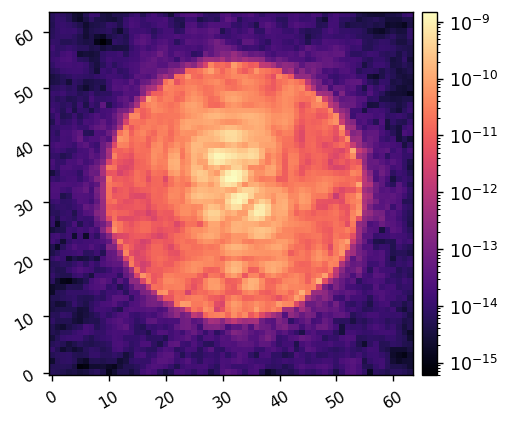

In [8]:
for psf in psfs:
    try:
        misc.imshow1(psf, lognorm=True)
        clear_output(wait=True)
        time.sleep(0.5)
    except KeyboardInterrupt:
        break

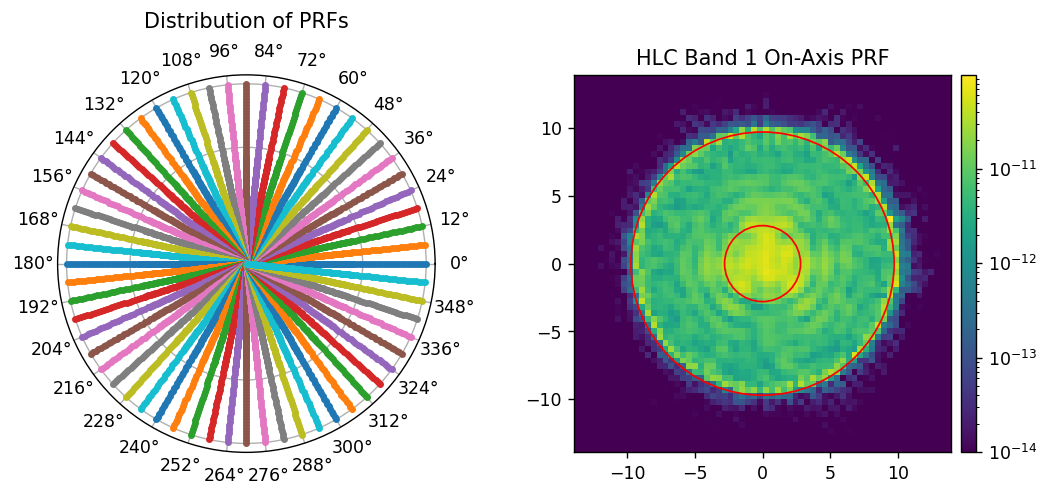

In [9]:
r_offsets_fpath = data_dir/'psfs'/'hlc_band1_psfs_radial_samples_20230501.fits'
thetas_fpath = data_dir/'psfs'/'hlc_band1_psfs_theta_samples_20230501.fits'

r_offsets = fits.getdata(r_offsets_fpath)
nr = len(r_offsets)
thetas = fits.getdata(thetas_fpath)*u.degree
nth = len(thetas)

# Plotting field angles
theta_offsets = []
for r in r_offsets[1:]:
    theta_offsets.append(thetas.to(u.radian).value)
theta_offsets = np.array(theta_offsets)
theta_offsets.shape

fig = plt.figure(dpi=125, figsize=(10,4))

ax1 = plt.subplot(121, projection='polar')
ax1.plot(theta_offsets, r_offsets[1:], '.')
ax1.set_rticks([iwa, owa, max(r_offsets)], linewidth=4)  # Less radial ticks
# ax1.set_rticks([])  # Less radial ticks
ax1.set_yticklabels([])
ax1.set_thetagrids(thetas[::2].value)
ax1.set_rlabel_position(55)  # Move radial labels away from plotted line
ax1.grid(True)
ax1.set_title('Distribution of PRFs', va='bottom')

ax2 = plt.subplot(122)
ext = [-psf_pixelscale_lamD*npsf/2, psf_pixelscale_lamD*npsf/2,
       -psf_pixelscale_lamD*npsf/2, psf_pixelscale_lamD*npsf/2]
im = ax2.imshow(psfs[0], norm=LogNorm(vmin=psfs[0].max()/1e4), cmap='viridis', extent=ext)
ax2.add_patch(Circle((0, 0), iwa, color='r', fill=False))
ax2.add_patch(Circle((0, 0), owa, color='r', fill=False))
ax2.set_title('HLC Band 1 On-Axis PRF')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="4%", pad=0.075)
fig.colorbar(im, cax=cax)

In [10]:
r_offsets, thetas

(array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
         1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
         1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
         2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
         2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
         3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
         3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
         4.1 ,  4.2 ,  4.3 ,  4.4 ,  4.5 ,  4.6 ,  4.7 ,  4.8 ,  4.9 ,
         5.  ,  5.1 ,  5.2 ,  5.3 ,  5.4 ,  5.5 ,  5.6 ,  5.7 ,  5.8 ,
         5.9 ,  6.  ,  6.1 ,  6.2 ,  6.3 ,  6.4 ,  6.5 ,  6.6 ,  6.7 ,
         6.8 ,  6.9 ,  7.  ,  7.1 ,  7.2 ,  7.3 ,  7.4 ,  7.5 ,  7.6 ,
         7.7 ,  7.8 ,  7.9 ,  8.  ,  8.1 ,  8.2 ,  8.3 ,  8.4 ,  8.5 ,
      

# Setup/Test the interpolating function

In [11]:
r_offsets_mas = r_offsets * mas_per_lamD

def find_closest_psf(xoff, yoff, verbose=True):
    r = np.sqrt(xoff**2+yoff**2)
    theta = np.arctan2(yoff,xoff).to(u.deg)
    if theta<0: theta += 360*u.deg
        
    kr = np.argmin(np.abs(r_offsets_mas-r))
    kth = np.argmin(np.abs(thetas-theta))
    theta_diff = theta - thetas[kth] # use this to rotate the closest available PSF to the coordinate of interest
    
    if kr==0: kpsf=0
    else: 
        kpsf = 1 + kth + (len(thetas))*(kr-1)
    
    if verbose: 
        print('Desired r={:.2f}, radial index={:d}, closest available r={:.2f}'.format(r, kr, r_offsets_mas[kr]))
        print('Desired th={:.2f}, theta index={:d}, closest available th={:.2f}, difference={:.2f}'.format(theta, kth, thetas[kth], theta_diff))
        print('PSF index = {:d}'.format(kpsf))
    
    closest_psf = psfs[kpsf]
    interpped_psf = rotate(closest_psf, -theta_diff.value, reshape=False, order=1)
    
    return interpped_psf

In [44]:
20.8*(5*npsf//7 - npsf//2)

270.40000000000003

Desired r=300.00 mas, radial index=100, closest available r=301.14 mas
Desired th=200.00 deg, theta index=33, closest available th=198.00 deg, difference=2.00 deg
PSF index = 5974


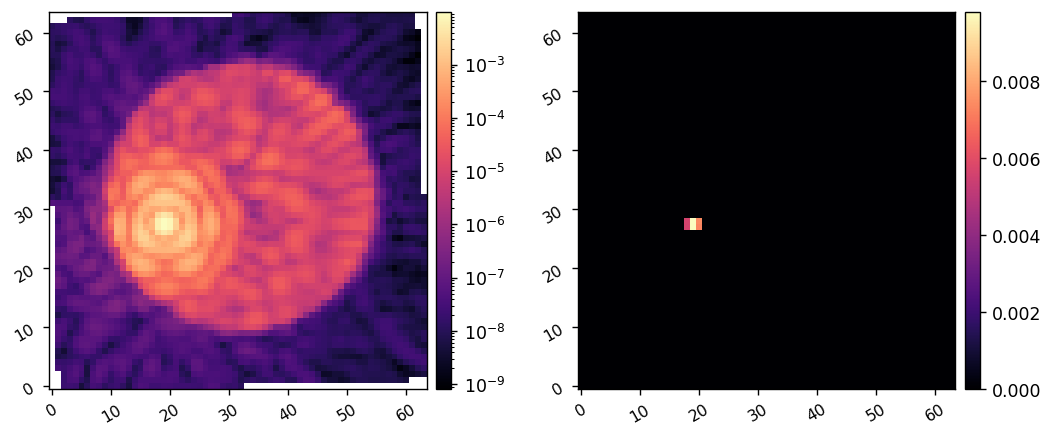

0.04552150603721477

In [18]:
r = 300*u.mas
th = 200*u.deg
xoff = r*np.cos(th)
yoff = r*np.sin(th)
psf = find_closest_psf(xoff,yoff)

mask = (psf>psf.max()/2)

misc.imshow2(psf, mask*psf, lognorm1=True)
np.sum(mask*psf)

# Create the grid for which the interpolated PSFs will be calculated

In [19]:
ndisk = 64
disk_pixelscale_mas = 21.84*u.mas/u.pix

x,y = np.meshgrid(np.arange(-ndisk/2,ndisk/2) + 1/2, np.arange(-ndisk/2,ndisk/2)+1/2 )
x = x.flatten()*disk_pixelscale_mas*u.pix
y = y.flatten()*disk_pixelscale_mas*u.pix
x

<Quantity [-687.96, -666.12, -644.28, ...,  644.28,  666.12,  687.96] mas>

Desired r=972.92 mas, radial index=154, closest available r=752.84 mas
Desired th=225.00 deg, theta index=37, closest available th=222.00 deg, difference=3.00 deg
PSF index = 9218


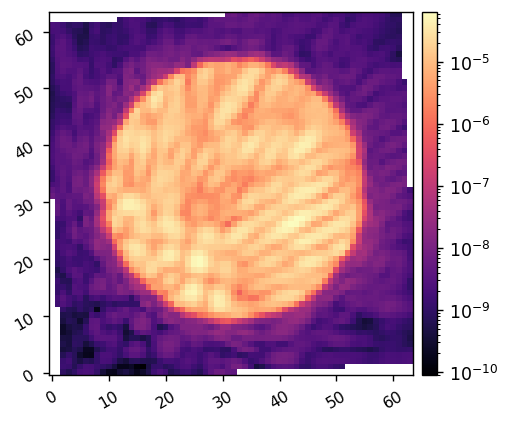

In [21]:
xoff = x[0]
yoff = y[0]
psf = find_closest_psf(xoff,yoff)

misc.imshow1(psf, lognorm=True)

In [23]:
ncols = ndisk**2
ipsf_matrix = np.zeros((npsf**2, ncols))

start=time.time()
for i in range(ncols):
    ipsf = find_closest_psf(x[i], y[i], verbose=False)
    ipsf_matrix[:,i] = ipsf.flatten() # assign the flattened psf to the column
    if i==ncols/8 or i==ncols/4 or i==ncols/2 or i==ncols*3/4 or i==ncols*7/8 or i==ncols-1:
        clear_output()
        print(i, time.time()-start)

4095 3.6941580772399902


In [25]:
f.close()

In [26]:
ipsf_fpath = data_dir/'ipsfs'/'hlc_band1_ipsfs_20230504.hdf5'
f = h5py.File(ipsf_fpath,'w')
f.create_dataset('ipsf_matrix', data=ipsf_matrix)
f.close()

# load and see if the matrix is correct

In [27]:
# ipsf_fpath = data_dir/'ipsfs'/'hlc_band1_ipsfs_20220920.hdf5'
# ipsf_fpath = data_dir/'ipsfs'/'hlc_band1_ipsfs_20221006.hdf5'
ipsf_fpath = data_dir/'ipsfs'/'hlc_band1_ipsfs_20230504.hdf5'

f = h5py.File(ipsf_fpath, 'r')
ipsf_matrix = np.array(f['ipsf_matrix'])
f.close()

In [28]:
ipsf_matrix.shape

(4096, 4096)

In [29]:
x.shape

(4096,)

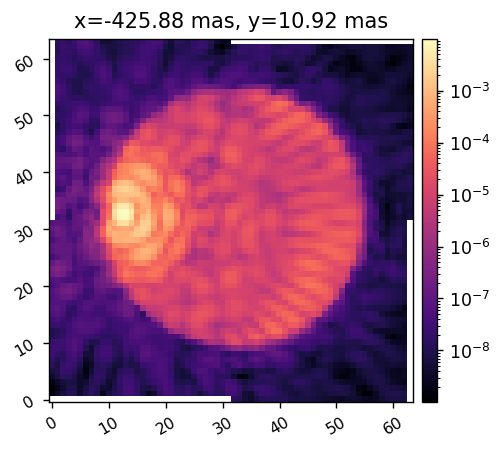

In [31]:
start = ipsf_matrix.shape[0]//2
for i in range(start, ipsf_matrix.shape[0]):
    try:
        misc.imshow1(ipsf_matrix[:,i].reshape(npsf,npsf), 'x={:.2f}, y={:.2f}'.format(x[i], y[i]), lognorm=True)
        clear_output(wait=True)
    except KeyboardInterrupt:
        break